# 1. Introduction to Supervised Learning


# 1.1 What is Supervised Learning?

Supervised learning is a machine learning type where an algorithm learns from labeled data (input features with correct outputs). The goal is to predict outputs for new, unseen data.

Think of it as learning with a teacher: the algorithm learns from examples to find patterns, then applies this knowledge to new problems.

**Examples:**

*   **Predicting House Prices:** Predict price based on features like square footage.
*   **Classifying Emails:** Determine if an email is spam or not.
*   **Diagnosing Diseases:** Predict disease based on symptoms.


# 1.2 Data: Features, Labels, Training Sets

Supervised learning requires specific data types:

*   **Features (Inputs):** Attributes describing each data point, used by the model for prediction.
    *   *Example (House Prices):* Square footage, bedrooms.
*   **Labels (Outputs):** The target variable the model predicts.
    *   *Example (House Prices):* Actual selling price.
*   **Training Set:** Labeled data used by the algorithm to learn relationships between features and labels.

We'll also discuss "test sets" and "validation sets" for model evaluation and tuning.


# 1.3 Metrics for Classification & Regression

Model evaluation depends on the problem type: **classification** or **regression**.

## Classification Metrics

Classification models predict discrete categories (e.g., spam/not spam).

Common metrics:

*   **Accuracy:** Proportion of correct predictions.
*   **Precision:** Of predicted positives, how many were actual positives.
*   **Recall (Sensitivity):** Of actual positives, how many were identified.
*   **F1-Score:** Harmonic mean of precision and recall.
*   **Confusion Matrix:** Table summarizing true/false positives/negatives.
*   **ROC-AUC:** Measures performance across thresholds.
*   **Brier Score:** Evaluates probabilistic predictions.

## Regression Metrics

Regression models predict continuous numerical values (e.g., house price).

Common metrics:

*   **Mean Absolute Error (MAE):** Average absolute difference between predicted and actual values.
*   **Mean Squared Error (MSE):** Average squared difference, penalizes larger errors.
*   **Root Mean Squared Error (RMSE):** Square root of MSE, in same units as target.
*   **R-squared (R²):** Proportion of target variance explained by features.

Choosing the right metric is crucial for model optimization.


# 1.4 Challenge: Quiz: Classification or Regression




# 2. Linear Regression

# 2.1 What is Linear Regression?

Linear Regression is a fundamental supervised learning algorithm for **regression tasks**, predicting a **continuous numerical value** based on input features. It assumes a linear relationship.

The goal is to find the "best-fit" line (or hyperplane) that minimizes the squared differences between actual and predicted values.

## The Linear Equation

For a single feature:

$$ y = mx + b $$

Where:
*   $y$: predicted label
*   $x$: input feature
*   $m$: slope (coefficient)
*   $b$: y-intercept

For multiple features:

$$ y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n $$

Training involves finding optimal coefficients ($b_0$ through $b_n$) to minimize prediction errors.


# 2.2 Implementing Linear Regression in Python

We'll use `scikit-learn` for implementation. First, a synthetic dataset.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# tell sklearn to output Pandas DataFrames
from sklearn import set_config
set_config(transform_output='pandas')

# Generate a synthetic dataset
np.random.seed(42)
num_samples = 100
X = 2 * np.random.rand(num_samples, 1) # A single feature
y = 4 + 3 * X + np.random.randn(num_samples, 1) # Linear relationship with some noise

# Create a DataFrame
df = pd.DataFrame({'feature': X.flatten(), 'target': y.flatten()})

print("First 5 rows of the synthetic dataset:")
print(df.head())
#

First 5 rows of the synthetic dataset:
    feature    target
0  0.749080  6.334288
1  1.901429  9.405278
2  1.463988  8.483724
3  1.197317  5.604382
4  0.312037  4.716440


Text(0.5, 1.0, 'Synthetic Dataset: Feature vs Target')

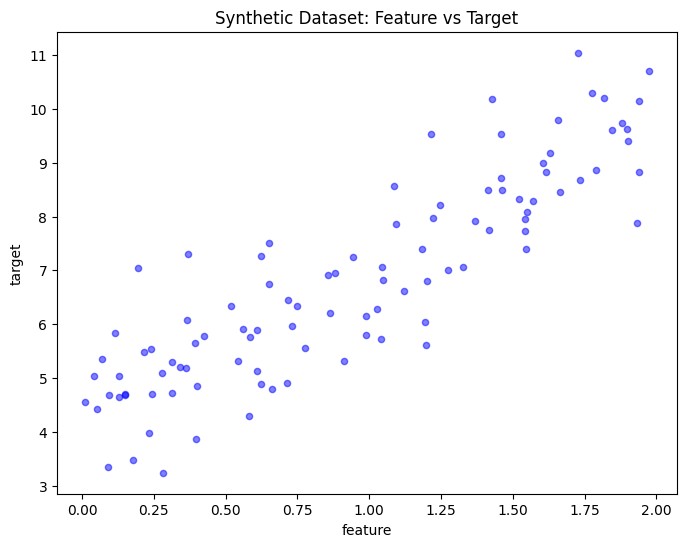

In [ ]:
# visualize the dataset
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

df.plot(kind='scatter', x='feature', y='target', ax=ax, color='blue', alpha=0.5)
plt.title('Synthetic Dataset: Feature vs Target')

/Users/matt/Dropbox/work/books/effective_openai/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(1.2, 5.600152850765989, 'Slope: 2.77\n rise for run of 1')

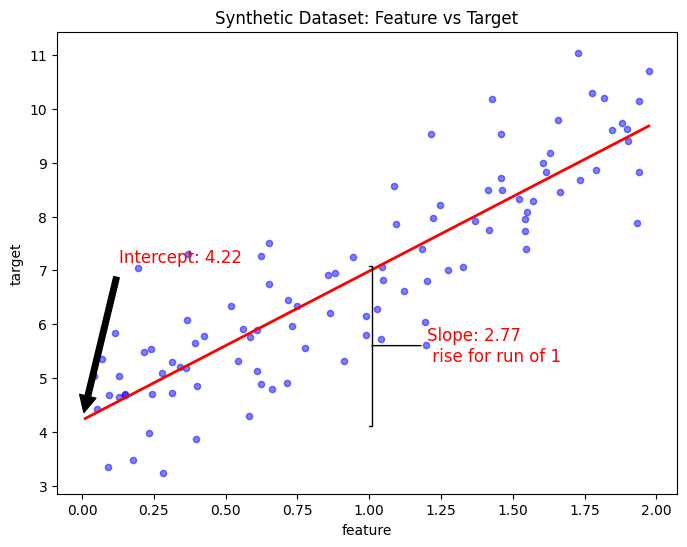

In [9]:
# make a model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['feature']], df['target'])

# Plot the regression line

fig, ax = plt.subplots(figsize=(8, 6))

df.plot(kind='scatter', x='feature', y='target', ax=ax, color='blue', alpha=0.5)
plt.title('Synthetic Dataset: Feature vs Target')


x_line = np.linspace(df['feature'].min(), df['feature'].max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
ax.plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')

# annotate intercept
ax.annotate(f'Intercept: {model.intercept_:.2f}', 
    xy=(0, model.intercept_),
    xytext=(0.1, 0.5),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=12, color='red')

# draw edges of slope from 1 to 2
ax.annotate(f'Slope: {model.coef_[0]:.2f}\n rise for run of 1', 
    xy=(1, model.intercept_ + model.coef_[0]*.5),
    xytext=(1.2, model.intercept_ + model.coef_[0]*.5),
    verticalalignment='center',
    arrowprops=dict(facecolor='black', #shrink=0.05,
                    arrowstyle='-[,widthB=4.8',
                    
                    relpos=(0, 0.5)),
    #xycoords='axes fraction', 
    fontsize=12, color='red')

## Splitting Data into Training and Testing Sets

Split data into training and testing sets. The model learns from training data and is evaluated on unseen testing data to assess generalization.


In [12]:
# Define features (X) and target (y)
X = df[['feature']]
y = df['target']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 80 samples
Testing set size: 20 samples


## Training the Linear Regression Model

Create and train a `LinearRegression` model using training data.


In [15]:
# Create a Linear Regression model instance
model = LinearRegression()
#
# Train the model using the training data
model.fit(X_train, y_train)
print(f"Model trained. Intercept: {model.intercept_:.2f}, Coefficient: {model.coef_[0]:.2f}")

Model trained. Intercept: 4.14, Coefficient: 2.80


## Making Predictions

Use the trained model to make predictions on the test set.


In [16]:
y_pred = model.predict(X_test)

(X_test
 .assign(predicted=y_pred,
         true=y_test)
)

,feature,predicted,true
83,0.127117,4.498754,5.037904
53,1.789655,9.152736,8.865488
70,1.544490,8.466439,7.396518
45,1.325045,7.852142,7.065746
44,0.517560,5.591731,6.343712
39,0.880305,6.607172,6.942462
22,0.584289,5.778528,5.757981
80,1.726207,8.975125,11.044395
10,0.041169,4.258159,5.038909
0,0.749080,6.239831,6.334288


# 2.3 Evaluating Linear Regression

Evaluate linear regression using MAE, MSE, RMSE, and R-squared.

## Interpreting the Metrics

*   **MAE:** Average prediction error magnitude.
*   **MSE:** Penalizes larger errors more.
*   **RMSE:** Square root of MSE, in target units.
*   **R²:** Proportion of target variance explained by the model.


In [17]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.59
Mean Squared Error (MSE): 0.65
Root Mean Squared Error (RMSE): 0.81
R-squared (R²): 0.81


# 2.4 Challenge: Evaluate Linear Regression

1.  Load the Ames Iowa Housing dataset from `https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip`.
2.  Select `Gr Liv Area` as feature (X) and `SalePrice` as target (y).
3.  Split data into training (80%) and testing (20%) sets (`random_state=42`).
4.  Train a `LinearRegression` model.
5.  Make predictions on test data.
6.  Calculate and print MAE, RMSE, and R².



# 2.5 Solution: Evaluate Linear Regression


# 3. Classification Algorithms

# 3.1 What is Classification?

Classification predicts a **discrete category or class**. It assigns data points to predefined categories, unlike regression which predicts continuous values.

## Types of Classification:

*   **Binary Classification:** Predicts one of two classes (e.g., Spam/Not Spam).
*   **Multi-class Classification:** Predicts one of more than two classes (e.g., animal types).

Output is typically a class label or a probability score.


# 3.2 Logistic Regression

**Logistic Regression** is a widely used algorithm for **binary classification**. It models the probability of an input belonging to a class by applying the logistic (sigmoid) function to a linear combination of features.

## Key Idea:

Transforms a linear equation's output into a probability (0 to 1) using the sigmoid function:

$$ P(Y=1|X) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + ... + b_nx_n)}} $$

We'll use the Titanic dataset to predict survival.


In [112]:
# simple illustration of logistic regression
from sklearn.linear_model import LogisticRegression

data = pd.DataFrame({'features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                     'target': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]})

X = data[['features']]
y = data['target']

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

Text(5.499945679288098, 0.6, 'Above x=4.50 is likely 1')

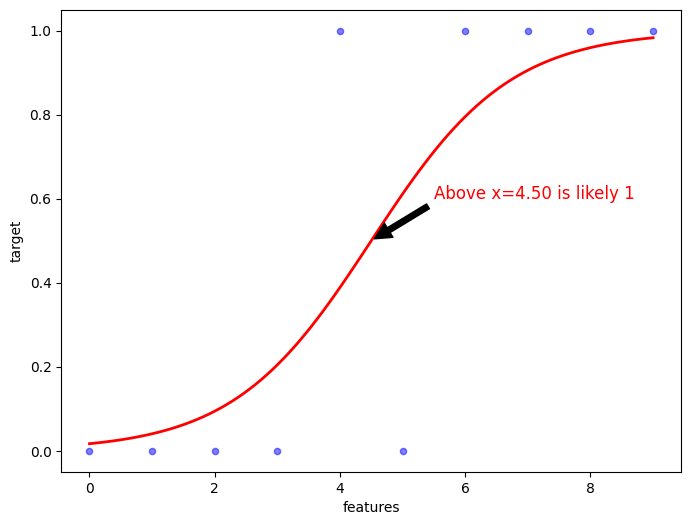

In [116]:
# plot the logistic regression curve
fig, ax = plt.subplots(figsize=(8, 6))
data.plot(kind='scatter', x='features', y='target', c='blue', alpha=0.5, ax=ax)
coef = model.coef_[0][0]
intercept = model.intercept_[0]
x_line = np.linspace(data['features'].min(), data['features'].max(), 100).reshape(-1, 1)
# use formula for logistic regression: p = 1 / (1 + exp(-(intercept + coef * x)))
y_line = 1 / (1 + np.exp(-(intercept + coef * x_line)))
ax.plot(x_line, y_line, color='red', linewidth=2, label='Logistic Regression Curve')
# annotate the .5 point
ax.annotate(f'Above x={-intercept/coef:.2f} is likely 1',
            xy=(-intercept/coef, 0.5),
            xytext=(-intercept/coef + 1, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, color='red')

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import requests
import io

# Load the Titanic dataset

url_titanic = "https://raw.githubusercontent.com/mattharrison/datasets/master/data/titanic3.xls"
titanic_df = pd.read_excel(url_titanic)

print("Titanic Dataset loaded. First 5 rows:")
print(titanic_df.head())
#

Titanic Dataset loaded. First 5 rows:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                        

<Axes: xlabel='age', ylabel='survived'>

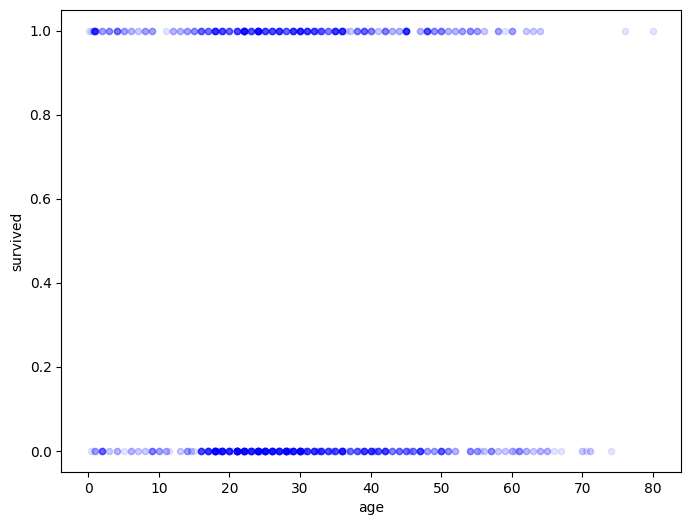

In [25]:
# Simple Logistic Regression Model
# Plot survival rate by age
fig, ax = plt.subplots(figsize=(8, 6))
titanic_df.plot.scatter(x='age', y='survived', ax=ax, alpha=0.1, color='blue')

In [28]:
# Plot Logistic Regression Model
# Plot survival rate by age
titanic_df.plot.scatter(x='age', y='survived', ax=ax, alpha=0.1, color='blue')

model = LogisticRegression(max_iter=1000)
# Define features (X) and target (y)
X_ames = titanic_df[['age']]
y_ames = titanic_df['survived']

model.fit(X_ames, y_ames)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Text(0.5, 1.0, 'Titanic Dataset: Age vs Survival Probability')

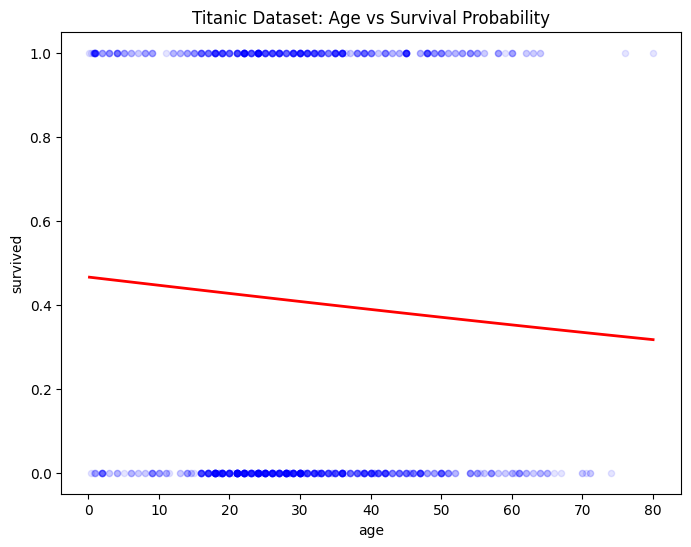

In [ ]:
# Plot Logistic Regression Model
# Plot survival rate by age
fig, ax = plt.subplots(figsize=(8, 6))
titanic_df.plot.scatter(x='age', y='survived', ax=ax, alpha=0.1, color='blue')

model = LogisticRegression(max_iter=1000)
# Define features (X) and target (y)
X_ames = titanic_df[['age']].dropna()  # Drop NaN values for age
y_ames = titanic_df['survived'].loc[X_ames.index]  # Align target with features

model.fit(X_ames, y_ames)


# Plot the logistic regression curve
x_line = np.linspace(titanic_df['age'].min(), titanic_df['age'].max(), 100).reshape(-1, 1)
coef = model.coef_[0][0]  # Coefficient for age
intercept = model.intercept_[0]  # Intercept
# Calculate the logistic function
y_line = 1 / (1 + np.exp(-(intercept + coef * x_line)))
ax.plot(x_line, y_line, color='red', linewidth=2, label='Logistic Regression Curve')
ax.set_title('Titanic Dataset: Age vs Survival Probability')



In [37]:
model.predict_proba([[84]])

/Users/matt/Dropbox/work/books/effective_openai/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.68994973, 0.31005027]])

(-299.8333, 380.0)

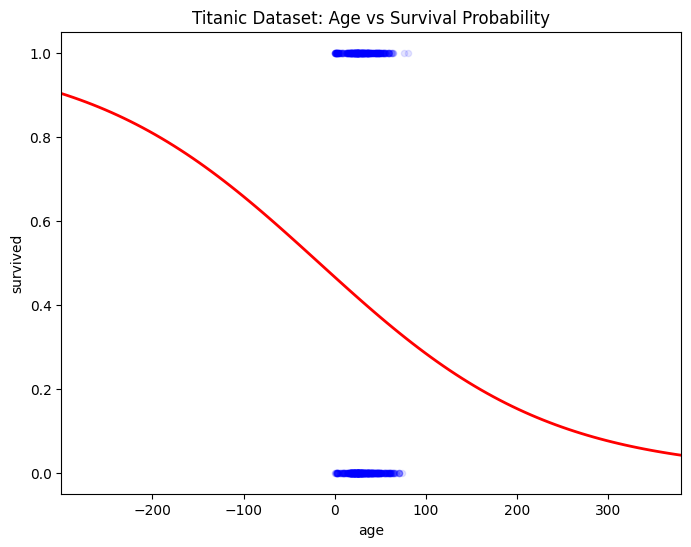

In [38]:
# widen x limits
x_min = titanic_df['age'].min() - 300
x_max = titanic_df['age'].max() + 300

# Plot the logistic regression curve

x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
coef = model.coef_[0][0]  # Coefficient for age
intercept = model.intercept_[0]  # Intercept
# Calculate the logistic function
y_line = 1 / (1 + np.exp(-(intercept + coef * x_line)))
fig, ax = plt.subplots(figsize=(8, 6))
titanic_df.plot.scatter(x='age', y='survived', ax=ax, alpha=0.1, color='blue')

ax.plot(x_line, y_line, color='red', linewidth=2, label='Logistic Regression Curve')
ax.set_title('Titanic Dataset: Age vs Survival Probability')
ax.set_xlim(x_min, x_max)

In [39]:
print(f'Coef for age: {coef:.2f}, Intercept: {intercept:.2f}')

Coef for age: -0.01, Intercept: -0.14


### Preprocessing for Logistic Regression

Data preprocessing is often necessary for classification, including handling missing values, encoding categorical features, and scaling numerical features.

We'll use `ColumnTransformer` to preprocess numerical and categorical features.


In [40]:
from sklearn.impute import SimpleImputer

#Select features and target
# 'Survived' is the target variable (0 = No, 1 = Yes)
# Features: 'pclass', 'sex, 'age', 'sibsp', 'parch', 'fare', 'embarked'
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

X_titanic = titanic_df[features]
y_titanic = titanic_df[target]

# Identify numerical and categorical features
numerical_features = ['age', 'sibsp', 'parch', 'fare']
categorical_features = ['pclass', 'sex', 'embarked']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Fill missing Age/Fare with mean
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing Embarked with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore',
                             sparse_output=False)) # One-hot encode categorical features
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
#

In [41]:
preprocessor.fit_transform(X_titanic).head()

,num__age,num__sibsp,num__parch,num__fare,cat__pclass_1,cat__pclass_2,cat__pclass_3,cat__sex_female,cat__sex_male,cat__embarked_C,cat__embarked_Q,cat__embarked_S
0,-0.068420,-0.479087,-0.445000,3.442480,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-2.249092,0.481288,1.866526,2.286476,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-2.164974,0.481288,1.866526,2.286476,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.009230,0.481288,1.866526,2.286476,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.379021,0.481288,1.866526,2.286476,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Building and Training the Logistic Regression Pipeline

Combine preprocessing and Logistic Regression into a `Pipeline` for consistent application to training and testing data.


In [ ]:
# Create the full pipeline
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Split data into training and testing sets
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    X_titanic, y_titanic, test_size=0.2, random_state=42
)

# Train the model
logistic_regression_pipeline.fit(X_train_titanic, y_train_titanic)

# Make predictions
y_pred_lr = logistic_regression_pipeline.predict(X_test_titanic)

# Evaluate the model
accuracy_lr = accuracy_score(y_test_titanic, y_pred_lr)
precision_lr = precision_score(y_test_titanic, y_pred_lr)
recall_lr = recall_score(y_test_titanic, y_pred_lr)
f1_lr = f1_score(y_test_titanic, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test_titanic, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")
print(f"Logistic Regression F1-Score: {f1_lr:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_lr)
#

Logistic Regression Accuracy: 0.77
Logistic Regression Precision: 0.82
Logistic Regression Recall: 0.64
Logistic Regression F1-Score: 0.72

Confusion Matrix:
 [[127  17]
 [ 42  76]]


# 3.3 K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is a simple, non-parametric algorithm for classification and regression. For classification, it classifies a new data point by a majority vote of its 'k' nearest neighbors.

## Key Idea:

"Birds of a feather flock together." Data points are classified by their closest neighbors.

Let's apply KNN to the Titanic dataset.


In [117]:
# create a plot to demonstrate k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
# Create a simple dataset
data_knn = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [1, 2, 1, 2, 3, 3, 4, 4, 5, 5],
    'target': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})

model = KNeighborsClassifier(n_neighbors=3)
# Define features (X) and target (y)
X_knn = data_knn[['feature1', 'feature2']]
y_knn = data_knn['target']
model.fit(X_knn, y_knn)

KNeighborsClassifier(n_neighbors=3)

/Users/matt/Dropbox/work/books/effective_openai/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'K-Nearest Neighbors Decision Boundary')

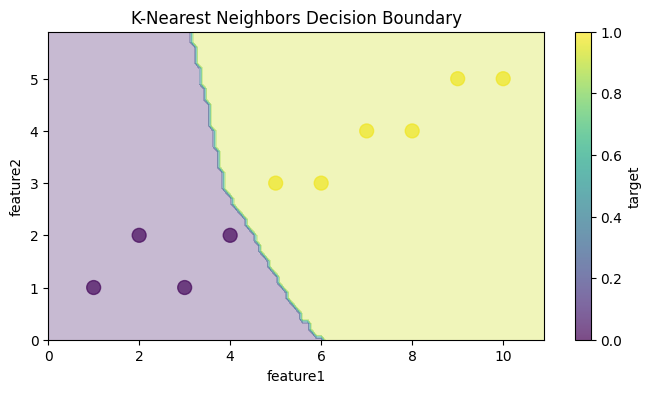

In [120]:
# plot points and decision boundary
fig, ax = plt.subplots(figsize=(8, 4))

data_knn.plot(kind='scatter', x='feature1', y='feature2', c='target', 
              colormap='viridis', ax=ax, s=100, alpha=0.7)

# Create a grid to plot the decision boundary
x_min, x_max = data_knn['feature1'].min() - 1, data_knn['feature1'].max() + 1
y_min, y_max = data_knn['feature2'].min() - 1, data_knn['feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict on the grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Reshape the predictions back to the grid shape
Z = Z.reshape(xx.shape)
# Plot the decision boundary
ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
ax.set_title('K-Nearest Neighbors Decision Boundary')

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Create the full pipeline for KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    
    ('classifier', KNeighborsClassifier(n_neighbors=5))]) 

# Train the model
knn_pipeline.fit(X_train_titanic, y_train_titanic)

# Make predictions
y_pred_knn = knn_pipeline.predict(X_test_titanic)

# Evaluate the model
accuracy_knn = accuracy_score(y_test_titanic, y_pred_knn)
precision_knn = precision_score(y_test_titanic, y_pred_knn)
recall_knn = recall_score(y_test_titanic, y_pred_knn)
f1_knn = f1_score(y_test_titanic, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_titanic, y_pred_knn)

print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}")
print(f"K-Nearest Neighbors Precision: {precision_knn:.2f}")
print(f"K-Nearest Neighbors Recall: {recall_knn:.2f}")
print(f"K-Nearest Neighbors F1-Score: {f1_knn:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_knn)

K-Nearest Neighbors Accuracy: 0.76
K-Nearest Neighbors Precision: 0.80
K-Nearest Neighbors Recall: 0.64
K-Nearest Neighbors F1-Score: 0.71

Confusion Matrix:
 [[125  19]
 [ 43  75]]


# 3.4 Decision Trees

**Decision Trees** are intuitive supervised learning algorithms for classification and regression. They split datasets into smaller subsets based on feature values, forming a tree-like decision structure.

## Key Idea:

A series of "if-then-else" rules. Internal nodes test attributes, branches are outcomes, and leaf nodes are class labels or numerical values.

## Advantages:
*   Easy to understand and visualize.
*   Handles numerical and categorical data.
*   Requires minimal preprocessing.

## Disadvantages:
*   Prone to overfitting.
*   Can be unstable.

Let's implement a Decision Tree Classifier on the Titanic dataset.


In [121]:
# create a simple demonstration of decision trees
from sklearn.tree import DecisionTreeClassifier

# Create a simple dataset
data_tree = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [1, 2, 1, 2, 3, 3, 4, 4, 5, 5],
    'target': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})
# Define features (X) and target (y)
X_tree = data_tree[['feature1', 'feature2']]
y_tree = data_tree['target']

# Create and train the Decision Tree model
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_tree, y_tree)

DecisionTreeClassifier(random_state=42)

/Users/matt/Dropbox/work/books/effective_openai/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


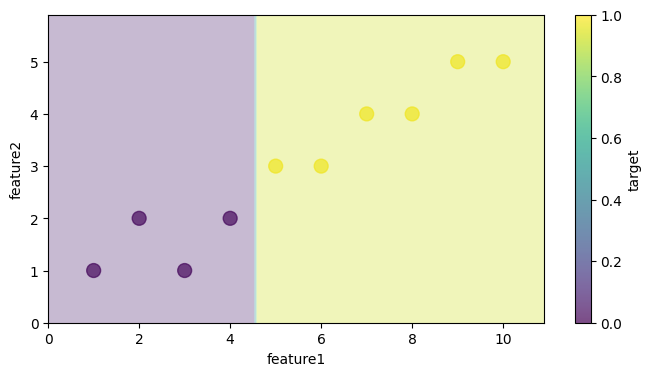

In [ ]:
# plot points and decision boundary
fig, ax = plt.subplots(figsize=(8, 4))
data_tree.plot(kind='scatter', x='feature1', y='feature2', c='target', 
              colormap='viridis', ax=ax, s=100, alpha=0.7)
# Create a grid to plot the decision boundary
x_min, x_max = data_tree['feature1'].min() - 1, data_tree['feature1'].max() + 1
y_min, y_max = data_tree['feature2'].min() - 1, data_tree['feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict on the grid points
Z = model_tree.predict(np.c_[xx.ravel(), yy.ravel()])
# Reshape the predictions back to the grid shape
Z = Z.reshape(xx.shape)
# Plot the decision boundary
ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')#

[Text(0.5, 0.75, 'feature1 <= 4.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]\nclass = 1'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 1'),
 Text(0.625, 0.5, '  False')]

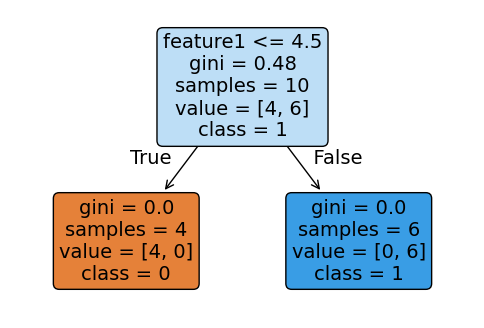

In [126]:
# plot the decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(6,4))
plot_tree(model_tree, filled=True, feature_names=X_tree.columns, class_names=['0', '1'], ax=ax,
          fontsize=14, rounded=True)

In [127]:
from sklearn.tree import DecisionTreeClassifier
#
# Create the full pipeline for Decision Tree
# Note: Decision Trees don't strictly require scaling, but the preprocessor handles imputation and one-hot encoding.
# We can remove the scaler from the numerical_transformer if we want to be strict about it,
# but for consistency in the pipeline structure, we'll keep it.
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', DecisionTreeClassifier(random_state=42))])

# Train the model
decision_tree_pipeline.fit(X_train_titanic, y_train_titanic)

# Make predictions
y_pred_dt = decision_tree_pipeline.predict(X_test_titanic)

# Evaluate the model
accuracy_dt = accuracy_score(y_test_titanic, y_pred_dt)
precision_dt = precision_score(y_test_titanic, y_pred_dt)
recall_dt = recall_score(y_test_titanic, y_pred_dt)
f1_dt = f1_score(y_test_titanic, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test_titanic, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Decision Tree Precision: {precision_dt:.2f}")
print(f"Decision Tree Recall: {recall_dt:.2f}")
print(f"Decision Tree F1-Score: {f1_dt:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_dt)

Decision Tree Accuracy: 0.76
Decision Tree Precision: 0.77
Decision Tree Recall: 0.66
Decision Tree F1-Score: 0.71

Confusion Matrix:
 [[121  23]
 [ 40  78]]


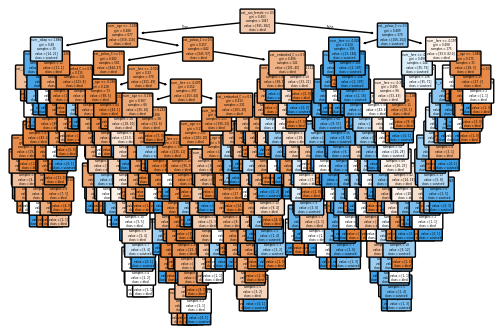

In [ ]:
# plot tree
fig, ax = plt.subplots(figsize=(6, 4))
_ = plot_tree(decision_tree_pipeline.named_steps['classifier'], filled=True, 
          # get column names from the preprocessor
           feature_names=preprocessor.get_feature_names_out(), 
           class_names=['died', 'survived'], ax=ax,
           fontsize=2, rounded=True)

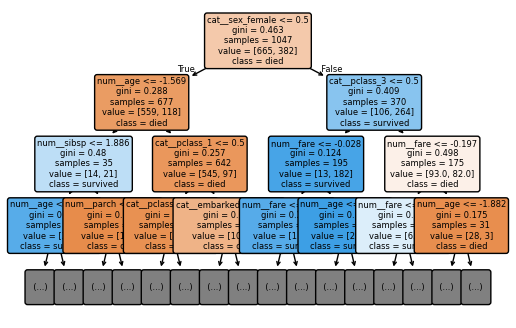

In [136]:
# first 3 levels
fig, ax = plt.subplots(figsize=(6, 4))
_ = plot_tree(decision_tree_pipeline.named_steps['classifier'], filled=True, 
              max_depth=3,
          # get column names from the preprocessor
           feature_names=preprocessor.get_feature_names_out(), 
           class_names=['died', 'survived'], ax=ax,
           fontsize=6, rounded=True)

# 3.5 Challenge: A classification model

Find the `K` value (`n_neighbors`) that yields the best *accuracy* for KNN on the Titanic dataset.

Score the result on the test set to avoid overfitting.


# 3.6 Solution: A classification model


# 4. Overfitting & Underfitting

# 4.1 Understanding Overfitting & Underfitting

Ensuring a model performs well on unseen data is key. This involves understanding **overfitting** and **underfitting**, related to the **bias-variance trade-off**.

## Underfitting (High Bias)

An **underfit** model is too simple, failing to capture training data patterns. It performs poorly on both training and new data.

*   **Characteristics:** High training and test error; simplistic model.
*   **Causes:** Insufficient model complexity, features, or too much regularization.
*   **Analogy:** A student unprepared for a test.

## Overfitting (High Variance)

An **overfit** model learns training data too well, including noise. It performs excellently on training data but poorly on unseen data.

*   **Characteristics:** Very low training error, much higher test error; overly complex model.
*   **Causes:** Excessive model complexity, too many features, insufficient training data, or lack of regularization.
*   **Analogy:** A student who memorizes answers without understanding concepts.

## The Bias-Variance Trade-off

*   **Bias:** Error from approximating a complex problem with a simple model. High bias leads to underfitting.
*   **Variance:** Model performance variability with different training data subsets. High variance leads to overfitting.

The goal is a "Goldilocks" model: complex enough to capture patterns, simple enough to generalize.


# 4.2 Decision Stumps

A **Decision Stump** is a decision tree with `max_depth=1`, making predictions based on a single split. It's a classic example of an **underfit** model due to its simplicity and high bias.

Let's demonstrate a decision stump on the Titanic dataset.


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#
# Re-using X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic, and preprocessor from Section 3
# Ensure these are available in the current session or re-run previous cells if needed.
#
# Create a Decision Stump (max_depth=1)
stump_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', DecisionTreeClassifier(max_depth=1, random_state=42))])

# Train the model
stump_pipeline.fit(X_train_titanic, y_train_titanic)

# Make predictions
y_pred_stump_train = stump_pipeline.predict(X_train_titanic)
y_pred_stump_test = stump_pipeline.predict(X_test_titanic)
#
# Evaluate
train_accuracy_stump = accuracy_score(y_train_titanic, y_pred_stump_train)
test_accuracy_stump = accuracy_score(y_test_titanic, y_pred_stump_test)

print(f"Decision Stump Training Accuracy: {train_accuracy_stump:.2f}")
print(f"Decision Stump Test Accuracy: {test_accuracy_stump:.2f}")
#

Decision Stump Training Accuracy: 0.79
Decision Stump Test Accuracy: 0.76


Low accuracy on both sets indicates **underfitting**. The model is too simple for the Titanic data.


# 4.3 Overfitting

Demonstrate **overfitting** with an unconstrained Decision Tree. It perfectly fits training data (including noise) but generalizes poorly to new data.


In [48]:
# Create a Decision Tree with no max_depth (allowing it to grow fully)
overfit_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('classifier', DecisionTreeClassifier(random_state=42))]) # No max_depth
#
# Train the model
overfit_tree_pipeline.fit(X_train_titanic, y_train_titanic)

# Make predictions
y_pred_overfit_train = overfit_tree_pipeline.predict(X_train_titanic)
y_pred_overfit_test = overfit_tree_pipeline.predict(X_test_titanic)

# Evaluate
train_accuracy_overfit = accuracy_score(y_train_titanic, y_pred_overfit_train)
test_accuracy_overfit = accuracy_score(y_test_titanic, y_pred_overfit_test)

print(f"Overfit Decision Tree Training Accuracy: {train_accuracy_overfit:.2f}")
print(f"Overfit Decision Tree Test Accuracy: {test_accuracy_overfit:.2f}")

Overfit Decision Tree Training Accuracy: 0.97
Overfit Decision Tree Test Accuracy: 0.76


High training accuracy and much lower test accuracy clearly show **overfitting**.


# 4.4 Cross-validation & Goldilocks

**Cross-Validation** provides a robust performance estimate and helps find the "Goldilocks" model that balances bias and variance.

## K-Fold Cross-Validation

1.  Dataset split into K "folds."
2.  Model trained K times: one fold for validation, K-1 for training.
3.  Performance metric recorded for each iteration.
4.  Final performance is the average of K metrics.

This ensures comprehensive evaluation and is vital for **hyperparameter tuning**.

Let's use `cross_val_score` for K-Fold Cross-Validation on our Decision Tree.


In [49]:
from sklearn.model_selection import cross_val_score
#
# Create a Decision Tree classifier (we'll try a moderate depth for now)
# We'll use the preprocessor from before.
tree_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))])
#
# Perform 5-fold cross-validation
# 'accuracy' is the scoring metric
# cv=5 means 5 folds
cv_scores = cross_val_score(tree_classifier, X_titanic, y_titanic, cv=5, scoring='accuracy')

print(f"Cross-validation scores (Accuracy) for each fold: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Cross-validation Accuracy: {cv_scores.std():.2f}")

Cross-validation scores (Accuracy) for each fold: [0.51526718 0.80916031 0.76717557 0.70992366 0.63601533]
Mean Cross-validation Accuracy: 0.69
Standard Deviation of Cross-validation Accuracy: 0.10


Mean cross-validation accuracy gives a reliable performance estimate. Standard deviation shows variability.


# 4.5 Challenge: Goldilocks Model

Find the "Goldilocks" `max_depth` for a `DecisionTreeClassifier` on the Titanic dataset using cross-validation.

1.  Re-use `X_titanic`, `y_titanic`, and `preprocessor`.
2.  Iterate `max_depth` from 1 to 15.
3.  For each `max_depth`:
    *   Create a `Pipeline` with `preprocessor` and `DecisionTreeClassifier` (`random_state=42`).
    *   Perform 5-fold cross-validation (`scoring='accuracy'`).
    *   Print `max_depth` and mean CV accuracy.
4.  Identify the `max_depth` with the highest mean accuracy.


# 4.6 Solution: Goldilocks Model


# 5. Additional Techniques

# 5.1 Ensembles: Bagging & Boosting

**Ensemble methods** combine multiple models to improve predictive performance, reducing bias, variance, or both.

Two main categories: **Bagging** and **Boosting**.

## Bagging (Bootstrap Aggregating)

Bagging trains multiple models on different random data subsets (bootstrapping). Predictions are combined (averaged for regression, majority vote for classification).

*   **Key Idea:** Reduce variance by averaging noise.
*   **Example:** **Random Forests**
    *   Ensemble of decision trees.
    *   Each tree trained on a bootstrap sample and random feature subset.
    *   Final prediction by majority vote (classification) or average (regression).
    *   Effective, robust to overfitting, handles high-dimensional data.


In [51]:
# Bagging with Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
# Train the model
rf_pipeline.fit(X_train_titanic, y_train_titanic)
# Make predictions
y_pred_rf = rf_pipeline.predict(X_test_titanic)
# Evaluate the model
accuracy_rf = accuracy_score(y_test_titanic, y_pred_rf)
precision_rf = precision_score(y_test_titanic, y_pred_rf)
recall_rf = recall_score(y_test_titanic, y_pred_rf)
f1_rf = f1_score(y_test_titanic, y_pred_rf)

conf_matrix_rf = confusion_matrix(y_test_titanic, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest Precision: {precision_rf:.2f}")
print(f"Random Forest Recall: {recall_rf:.2f}")
print(f"Random Forest F1-Score: {f1_rf:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_rf)

Random Forest Accuracy: 0.79
Random Forest Precision: 0.81
Random Forest Recall: 0.70
Random Forest F1-Score: 0.75

Confusion Matrix:
 [[125  19]
 [ 35  83]]



## Boosting

Boosting trains models sequentially, each correcting errors of previous ones. Models focus on misclassified instances.

*   **Key Idea:** Reduce bias by iteratively improving predictions.
*   **Examples:**
    *   **AdaBoost:** Weights misclassified samples.
    *   **Gradient Boosting Machines (GBM):** Builds trees to predict residuals.
    *   **XGBoost:** Optimized gradient boosting, fast and performant, includes regularization.

Ensembles are often preferred for state-of-the-art performance.


In [53]:
# boosting with XGBoost
from xgboost import XGBClassifier

# Create an XGBoost classifier
# don't need to scale or one-hot encode, XGBoost handles categorical features internally
xgb = XGBClassifier(enable_categorical=True, random_state=42)

xgb.fit(X_train_titanic.astype(
    {col: 'category' for col in categorical_features}
), y_train_titanic)

# Make predictions
y_pred_xgb = xgb.predict(X_test_titanic.astype(
    {col: 'category' for col in categorical_features}
))
# Evaluate the model
accuracy_xgb = accuracy_score(y_test_titanic, y_pred_xgb)
precision_xgb = precision_score(y_test_titanic, y_pred_xgb)
recall_xgb = recall_score(y_test_titanic, y_pred_xgb)
f1_xgb = f1_score(y_test_titanic, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_titanic, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost Precision: {precision_xgb:.2f}")
print(f"XGBoost Recall: {recall_xgb:.2f}")
print(f"XGBoost F1-Score: {f1_xgb:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_xgb)

XGBoost Accuracy: 0.81
XGBoost Precision: 0.84
XGBoost Recall: 0.71
XGBoost F1-Score: 0.77

Confusion Matrix:
 [[128  16]
 [ 34  84]]


# 5.2 Tuning Hyperparameters

Machine learning models have:

*   **Model Parameters:** Learned during training.
*   **Hyperparameters:** External settings, set before training (e.g., `max_depth`).

**Hyperparameter tuning** finds optimal hyperparameters to improve model performance and prevent under/overfitting.

## Grid Search Cross-Validation (`GridSearchCV`)

`GridSearchCV` systematically tunes hyperparameters:

1.  Define a grid of hyperparameter values.
2.  For each combination:
    *   Train model using K-Fold Cross-Validation.
    *   Record average performance.
3.  Selects the best performing combination.

This exhaustive method guarantees finding the best combination within the grid.

Let's tune a `RandomForestClassifier` using `GridSearchCV`.


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#
# Re-using X_titanic, y_titanic, and preprocessor from previous sections
# Ensure these are available in the current session or re-run previous cells if needed.
#
# Define the pipeline with a RandomForestClassifier placeholder
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Define the grid of hyperparameters to search
# Note: Hyperparameter names in GridSearchCV for pipelines follow the format 'stepname__parametername'
param_grid = {
    'classifier__n_estimators': [50, 100, 200], # Number of trees in the forest
    'classifier__max_depth': [None, 5, 10] # Maximum depth of the tree
}

# Create GridSearchCV object
# cv=5 for 5-fold cross-validation
# scoring='accuracy' to optimize for accuracy
# n_jobs=-1 uses all available CPU cores
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform the grid search on the full dataset (GridSearchCV handles splitting internally)
grid_search.fit(X_titanic, y_titanic)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found: {'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best cross-validation accuracy: 0.69


In [ ]:
# The best model is available via grid_search.best_estimator_
best_rf_model = grid_search.best_estimator_

# Evaluate on the test set (if you had a separate, untouched test set)
# For demonstration, we'll use the original X_test_titanic, y_test_titanic from Section 3
# In a real scenario, you'd split your data into train/validation/test *before* GridSearchCV.
# Here, GridSearchCV uses cross-validation on X_titanic, y_titanic, so its best_score_ is a good estimate.
# If you want to evaluate on a truly unseen test set, you'd need to split X_titanic, y_titanic once at the beginning.
#
# For consistency with previous sections, let's re-split the data for final evaluation
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_titanic, y_titanic, test_size=0.2, random_state=42
)

# Train the best model on the full training data (or use grid_search.best_estimator_ directly if it was fit on X_train_final)
# Note: grid_search.best_estimator_ is already trained on the best parameters using the full X_titanic, y_titanic
# For a proper final evaluation on an unseen test set, you'd typically refit the best_estimator_ on the *entire* training set
# (X_train_final, y_train_final) and then evaluate on X_test_final, y_test_final.
# However, GridSearchCV's `refit=True` (default) means `best_estimator_` is refit on the *entire* dataset passed to `.fit()`.
# So, for a truly held-out test set, you'd do:
grid_search.fit(X_train_final, y_train_final)
y_pred_tuned = grid_search.predict(X_test_final)
accuracy_tuned = accuracy_score(y_test_final, y_pred_tuned)
print(f"Accuracy of best model on held-out test set: {accuracy_tuned:.2f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Accuracy of best model on held-out test set: 0.77


# 5.3 Explaining Simple Models

Understanding model predictions is crucial for trust and debugging. This is **model interpretability**.

Simpler models are often straightforward to interpret:

*   **Linear Regression:** Coefficients show feature impact.
*   **Logistic Regression:** Coefficients indicate relationship with log-odds.
*   **Decision Trees:** Tree structure provides explicit rules; feature importance shows contribution.

Let's look at interpreting these models.

## Interpreting Logistic Regression Coefficients

Coefficients (`coef_`) and intercept (`intercept_`) show feature impact on log-odds of the target. Map them back to original feature names for interpretability.


In [56]:
# Re-using logistic_regression_pipeline from Section 3.2
# Ensure it's trained: logistic_regression_pipeline.fit(X_train_titanic, y_train_titanic)

# Get the trained Logistic Regression classifier
lr_classifier = logistic_regression_pipeline.named_steps['classifier']

# Get the preprocessor
lr_preprocessor = logistic_regression_pipeline.named_steps['preprocessor']

# Get feature names after preprocessing
# Numerical features are scaled, categorical features are one-hot encoded
processed_feature_names = lr_preprocessor.get_feature_names_out()

# Create a DataFrame for coefficients
lr_coefficients = pd.DataFrame({
    'Feature': processed_feature_names,
    'Coefficient': lr_classifier.coef_[0] # For binary classification, there's one row of coefficients
})

print("Logistic Regression Coefficients:")
print(lr_coefficients.sort_values(by='Coefficient', ascending=False))
print(f"\nLogistic Regression Intercept: {lr_classifier.intercept_[0]:.4f}")

Logistic Regression Coefficients:
            Feature  Coefficient
7   cat__sex_female     1.293624
4     cat__pclass_1     0.845066
9   cat__embarked_C     0.352646
3         num__fare     0.098395
5     cat__pclass_2     0.034943
2        num__parch    -0.042516
10  cat__embarked_Q    -0.123088
11  cat__embarked_S    -0.231178
1        num__sibsp    -0.272905
0          num__age    -0.396015
6     cat__pclass_3    -0.881629
8     cat__sex_male    -1.295243

Logistic Regression Intercept: -0.0016


**Interpretation:**
*   Positive coefficient: Feature increase (or presence) increases log-odds of survival.
*   Negative coefficient: Feature increase (or presence) decreases log-odds of survival.
*   Magnitude: Strength of relationship.

## Interpreting Decision Tree Feature Importances

Decision Trees (and ensembles like Random Forests) have `feature_importances_`. This shows relative importance based on impurity reduction.


In [57]:
# Re-using decision_tree_pipeline from Section 3.4
# Ensure it's trained: decision_tree_pipeline.fit(X_train_titanic, y_train_titanic)

# Get the trained Decision Tree classifier
dt_classifier = decision_tree_pipeline.named_steps['classifier']

# Get the preprocessor
dt_preprocessor = decision_tree_pipeline.named_steps['preprocessor']

# Get feature names after preprocessing
processed_feature_names_dt = dt_preprocessor.get_feature_names_out()

# Create a DataFrame for feature importances
dt_feature_importances = pd.DataFrame({
    'Feature': processed_feature_names_dt,
    'Importance': dt_classifier.feature_importances_
})

print("Decision Tree Feature Importances:")
print(dt_feature_importances.sort_values(by='Importance', ascending=False))

Decision Tree Feature Importances:
            Feature  Importance
7   cat__sex_female    0.310159
0          num__age    0.247269
3         num__fare    0.236789
6     cat__pclass_3    0.091025
1        num__sibsp    0.047375
2        num__parch    0.022038
4     cat__pclass_1    0.016394
9   cat__embarked_C    0.014355
11  cat__embarked_S    0.010588
5     cat__pclass_2    0.002229
10  cat__embarked_Q    0.001780
8     cat__sex_male    0.000000


**Interpretation:**
*   Higher importance: Greater contribution to predictions.
*   Titanic example: `Sex_male`, `Sex_female`, `Fare`, `Age` are often important.

For complex "black box" models (e.g., XGBoost, Neural Networks), advanced techniques like SHAP are needed.


# 5.4 SHAP

**SHAP (SHapley Additive exPlanations)** is a powerful framework for explaining any machine learning model's output. It uses Shapley values from game theory to attribute each feature's contribution to a prediction.

SHAP values show how each feature shifts the prediction from a baseline (e.g., average prediction) to the actual prediction.

*   **Key Idea:** Quantify each feature's contribution to an individual prediction.
*   **Advantages:**
    *   **Model-agnostic:** Works with any model.
    *   **Local interpretability:** Explains individual predictions.
    *   **Global interpretability:** Aggregates explanations for overall understanding.
    *   **Consistent:** Theoretically sound.

Let's demonstrate SHAP with an XGBoost model on the Titanic dataset.


In [67]:
X_train_titanic.dtypes

pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

xg_model = xgb.XGBClassifier(enable_categorical=True, random_state=42)

# Train the model
xg_model.fit(X_train_titanic.astype({'sex': 'category', 'embarked': 'category'}), y_train_titanic)

# Create a SHAP explainer object
# For tree models, shap.TreeExplainer is efficient
explainer = shap.TreeExplainer(xg_model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_titanic.astype({'sex': 'category', 'embarked': 'category'}))

## Visualizing SHAP Explanations

SHAP offers various visualization tools.

**Summary Plot (Global Feature Importance):** Shows overall feature impact.


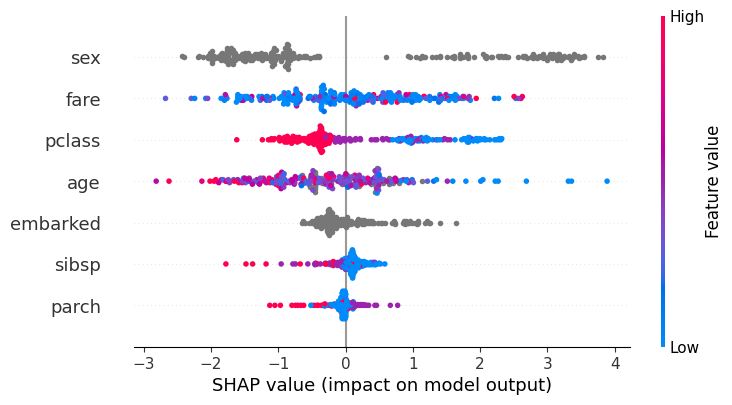

In [70]:
shap.plots.beeswarm(shap_values)

**Summary Plot (Feature Impact and Direction):** Shows how each feature affects individual predictions.


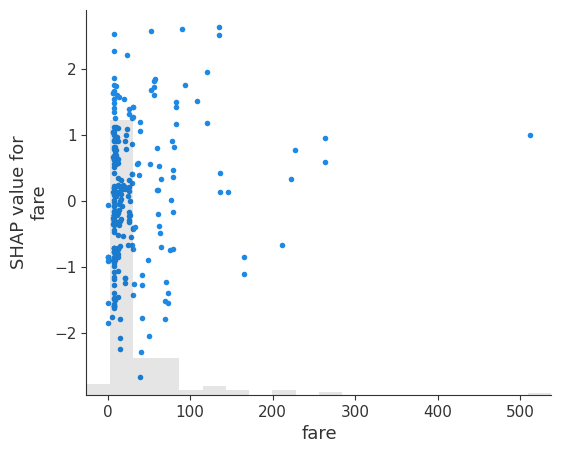

In [71]:
shap.plots.scatter(shap_values[:, 'fare'])

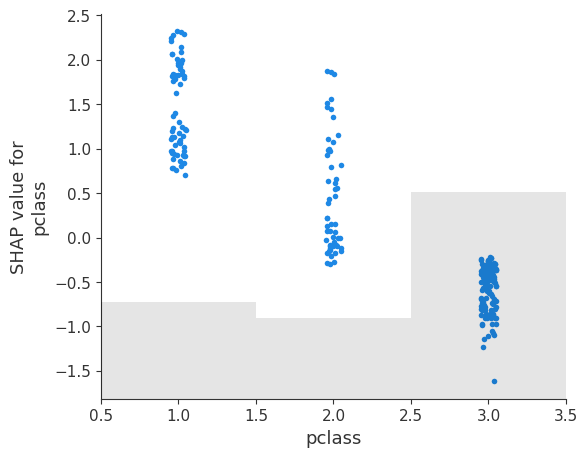

In [72]:
shap.plots.scatter(shap_values[:, 'pclass'])

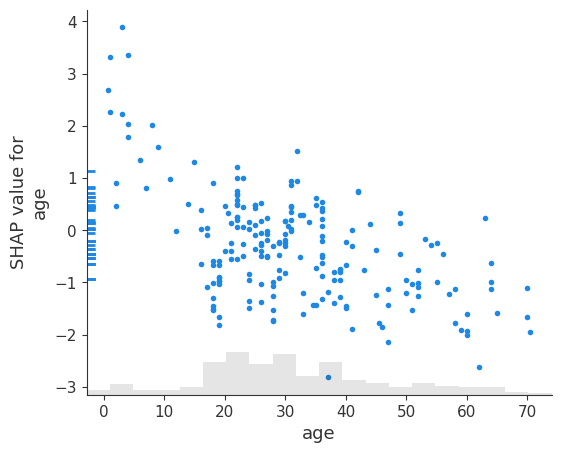

In [73]:
shap.plots.scatter(shap_values[:, 'age'])


# 5.5 Challenge: XGBoost Model

Build and tune an XGBoost classification model for the Titanic dataset.

Use grid search with `n_estimators`, `max_depth`, and `learning_rate` to try and beat the out-of-the-box model.


# 5.6 Solution: XGBoost Model


# 6. Deployment

# 6.1 Deploying with Flask

**Deployment** makes trained ML models accessible. **Flask** is a lightweight Python web framework for deploying models as web services (APIs).

## Steps for Flask Deployment:

1.  **Train and Save Model:** Save the trained model (and preprocessor) to a file (e.g., `joblib`).
2.  **Create Flask App:** Write `app.py` to set up a Flask server.
3.  **Load Model:** Load the saved model when the app starts.
4.  **Define API Endpoint:** Create a route (e.g., `/predict`) to:
    *   Receive input data (e.g., JSON POST request).
    *   Preprocess data.
    *   Make prediction.
    *   Return prediction as JSON.

Let's save our best XGBoost model and create `app.py`.


In [ ]:
!mkdir app

In [82]:
import joblib
import os

# Ensure the best_xgb_model and preprocessor are available from Section 5.6
# If running this cell independently, you might need to re-run Section 5.6's solution cell.

# The best_xgb_model is a Pipeline object, which includes the preprocessor and the classifier.
# This makes saving and loading very convenient.

# Define the filename for the saved model
model_filename = 'app/titanic_xgb_model.joblib'

# Save the entire pipeline
joblib.dump(best_xgb_model, model_filename) # Changed from xg_model to best_xgb_model

print(f"Model saved to {model_filename}")
print(f"File size: {os.path.getsize(model_filename) / (1024*1024):.2f} MB")

Model saved to app/titanic_xgb_model.joblib
File size: 0.20 MB


Now, let's create the `app.py` file that will serve this model.
You would typically run this `app.py` file from your terminal (e.g., `python app.py`).


In [98]:
%%writefile app/app.py
# app.py
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import os

app = Flask(__name__)

# Load the trained model pipeline
# This will load both the preprocessor and the classifier
try:
    # Adjust path if necessary, assuming model is in the same directory
    model_path = 'titanic_xgb_model.joblib'
    if not os.path.exists(model_path):
        print(f"Error: Model file not found at {model_path}. Please ensure it's saved.")
        model_pipeline = None
    else:
        model_pipeline = joblib.load(model_path)
        print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    model_pipeline = None

# Define the features that the model expects, in the correct order
# These should match the 'features' list used during training
EXPECTED_FEATURES = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

@app.route('/')
def home():
    """Simple root endpoint to confirm the API is running."""
    return "Welcome to the Titanic Survival Predictor API!"

@app.route('/predict', methods=['POST'])
def predict():
    if model_pipeline is None:
        return jsonify({'error': 'Model not loaded'}), 500

    data = request.get_json(force=True)

    if not data:
        return jsonify({'error': 'No data provided'}), 400

    # Convert input data to a pandas DataFrame
    # It's crucial that the column names match EXPECTED_FEATURES
    try:
        input_df = (pd.DataFrame([data], columns=EXPECTED_FEATURES)
        .astype({
            'embarked': 'category', 'sex': 'category'})
        )
    except KeyError as e:
        return jsonify({'error': f"Missing expected feature: {e}"}), 400
    except Exception as e:
        return jsonify({'error': f"Invalid input data format: {e}"}), 400

    # Make prediction
    try:
        prediction = model_pipeline.predict(input_df)
        prediction_proba = model_pipeline.predict_proba(input_df)

        # The prediction is a numpy array, convert to list/int for JSON
        result = {
            'prediction': int(prediction[0]),
            'probability_not_survived': float(prediction_proba[0][0]),
            'probability_survived': float(prediction_proba[0][1])
        }
        return jsonify(result)
    except Exception as e:
        # Log the full error for debugging
        app.logger.error(f"Prediction failed: {e}", exc_info=True)
        return jsonify({'error': f"Prediction failed: {e}. Check server logs for details."}), 500

if __name__ == '__main__':
    # Run the Flask app
    # In a production environment, use a production-ready WSGI server like Gunicorn
    app.run(host='0.0.0.0', port=5555, debug=True)



Overwriting app/app.py



**To run the Flask app:**
1.  Save the code above as `app.py` in the `app` directory.
2.  Open your terminal.
3.  Navigate to that directory: `cd app`
4.  Run: `uv run python app.py`

The Flask app should run on `http://127.0.0.1:5555/`.



# 6.2 Querying the Model

Send requests to the Flask app's `/predict` endpoint using `requests` to get predictions.

**Important:** Ensure `app.py` is running in a separate terminal before executing.


In [111]:
import requests
import json

# Define the URL of your Flask API endpoint
url = 'http://127.0.0.1:5555/predict'


def predict(data, url):
    print(f"Sending data: {data}") # Changed from passenger_data to data for clarity

    # Send a POST request with JSON data
    try:
        response = requests.post(url, json=data)
        response.raise_for_status() # Raise an exception for HTTP errors (4xx or 5xx)

        # Parse the JSON response
        prediction_result = response.json()

        print("\nPrediction Result:")
        print(f"  Survival Prediction (0=No, 1=Yes): {prediction_result['prediction']}")
        print(f"  Probability of Not Surviving: {prediction_result['probability_not_survived']:.4f}")
        print(f"  Probability of Surviving: {prediction_result['probability_survived']:.4f}")

    except requests.exceptions.ConnectionError as e:
        print(f"Error: Could not connect to the Flask server. Is app.py running? ({e})")
    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error: {e.response.status_code} - {e.response.text}")
        raise
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        raise

# Example input data for a passenger
# This data should match the features used during model training
passenger_data = {
    "pclass": 3,
    "sex": "male",
    "age": 55.0,
    "sibsp": 1,
    "parch": 2,
    "fare": 151.25,
    "embarked": "S"
}

predict(passenger_data, url)

Sending data: {'pclass': 3, 'sex': 'male', 'age': 55.0, 'sibsp': 1, 'parch': 2, 'fare': 151.25, 'embarked': 'S'}

Prediction Result:
  Survival Prediction (0=No, 1=Yes): 0
  Probability of Not Surviving: 0.8792
  Probability of Surviving: 0.1208


In [101]:
# female passenger example
passenger_data = {
    "pclass": 1,
    "sex": "female",
    "age": 35.0,
    "sibsp": 0,
    "parch": 0,
    "fare": 71.2833,
    "embarked": "C"
}

predict(passenger_data, url)

Sending data: {'pclass': 1, 'sex': 'female', 'age': 35.0, 'sibsp': 0, 'parch': 0, 'fare': 71.2833, 'embarked': 'C'}

Prediction Result:
  Survival Prediction (0=No, 1=Yes): 1
  Probability of Not Surviving: 0.0022
  Probability of Surviving: 0.9978


# 6.3 Challenge: Deployment

Create a Flask application for your optimized XGBoost model.

Test deployment by sending a POST request with sample data to `/predict`.


# 6.4 Solution: Deployment

Save the `best_xgb_model` from Section 5.6 to `app/titanic_xgb_model.joblib`.

Then, use the client-side Python script to test the deployed Flask application.
